In [1]:
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
wiki_data = pd.read_html(url)
toronto = wiki_data[0]
toronto.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [3]:
toronto.shape

(180, 3)

In [4]:
# clean the data
toronto = toronto[toronto['Borough'] != 'Not assigned']
toronto.reset_index(drop=True,inplace=True)

i = 0
for i in range(0,toronto.shape[0]):
    if toronto.iloc[i][2] == 'Not assigned':
        toronto.iloc[i][2] = toronto.iloc[i][1]
        i = i+1

toronto

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [5]:
toronto.shape

(103, 3)

In [6]:
toronto.describe()

,Postal Code,Borough,Neighbourhood
count,103,103,103
unique,103,10,99
top,M2N,North York,Downsview
freq,1,24,4


In [7]:
# function to get latitude longitude information
def get_latlong(postal_code):
    lat_long_coords = None
    while (lat_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lat_long_coords = g.latlng
        
    return lat_long_coords

get_latlong('M3A') # test function with an example

[43.75188000000003, -79.33035999999998]

In [8]:
postal_codes = toronto['Postal Code']
coords = [ get_latlong(postal_code) for postal_code in postal_codes.tolist() ]
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df_coords

,Latitude,Longitude
0,43.75188,-79.33036
1,43.73042,-79.31282
2,43.65514,-79.36265
3,43.72321,-79.45141
4,43.66449,-79.39302
5,43.66277,-79.52831
6,43.81153,-79.19552
7,43.74929,-79.36169
8,43.70794,-79.31160
9,43.65736,-79.37818


In [72]:
toronto['Latitude'] = df_coords['Latitude']
toronto['Longitude'] = df_coords['Longitude']
toronto

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75188,-79.33036
1,M4A,North York,Victoria Village,43.73042,-79.31282
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65514,-79.36265
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72321,-79.45141
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66449,-79.39302
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.66277,-79.52831
6,M1B,Scarborough,"Malvern, Rouge",43.81153,-79.19552
7,M3B,North York,Don Mills,43.74929,-79.36169
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70794,-79.31160
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.65736,-79.37818


In [10]:
address = 'Scarborough,Toronto'

geolocator = Nominatim(user_agent="kino-bot")
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Scarborough,Toronto are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Scarborough,Toronto are 43.773077, -79.257774.


In [109]:
map_Scarborough = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(toronto['Latitude'], toronto['Longitude'], toronto['Neighbourhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
   
map_Scarborough

In [12]:
CLIENT_ID = 'LWXTWVSCPDSVC1FLRT2RM00VNNK0JWZVQWDBRBYLLQ2JPKUP' # my Foursquare ID
CLIENT_SECRET = '2HGRUAJZPNENOBINI20TQ50E3SEAP3UITY1UQVXV5LFGMVSG' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentails:
CLIENT_ID: LWXTWVSCPDSVC1FLRT2RM00VNNK0JWZVQWDBRBYLLQ2JPKUP
CLIENT_SECRET: 2HGRUAJZPNENOBINI20TQ50E3SEAP3UITY1UQVXV5LFGMVSG


In [54]:
radius = 700 
LIMIT = 50
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_x, 
   longitude_y, 
    radius, 
   LIMIT)

# url= 'https://api.foursquare.com/v2/venues/search?&client_id=LWXTWVSCPDSVC1FLRT2RM00VNNK0JWZVQWDBRBYLLQ2JPKUP&client_secret=2HGRUAJZPNENOBINI20TQ50E3SEAP3UITY1UQVXV5LFGMVSG&v=20180604&ll=43.773077,-79.257774&radius=10&limit=10'
results = requests.get(url= url,timeout=50).json()

In [55]:
results

{'meta': {'code': 200, 'requestId': '5f3946efc84c6d0398b51276'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Scarborough City Centre',
  'headerFullLocation': 'Scarborough City Centre, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 53,
  'suggestedBounds': {'ne': {'lat': 43.77937700630001,
    'lng': -79.249065551366},
   'sw': {'lat': 43.76677699369999, 'lng': -79.266482448634}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c059bcd7083952134097bce',
       'name': 'SEPHORA',
       'location': {'address': '300 Borough Drive',
        'crossStreet': 'at Scarborough Town Centre',
        'lat': 43.77501688366838,
        'lng': -79.25810909472256,

In [57]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.neighborhood', 'venue.events.count',
       'venue.events.summary', 'venue.venuePage.id'],
      dtype='object')

In [58]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [59]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,SEPHORA,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.775017,-79.258109
1,Disney Store,"[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",43.775537,-79.256833
2,American Eagle Store,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.776012,-79.258334
3,DAVIDsTEA,"[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",43.776320,-79.258688
4,Chipotle Mexican Grill,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",43.776410,-79.258069


In [60]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,SEPHORA,Cosmetics Shop,43.775017,-79.258109
1,Disney Store,Toy / Game Store,43.775537,-79.256833
2,American Eagle Store,Clothing Store,43.776012,-79.258334
3,DAVIDsTEA,Tea Room,43.776320,-79.258688
4,Chipotle Mexican Grill,Mexican Restaurant,43.776410,-79.258069


In [61]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Clothing Store      8
Coffee Shop         5
Restaurant          4
Gas Station         2
Pharmacy            2
Tea Room            2
Sandwich Place      2
Bakery              1
Department Store    1
Movie Theater       1
Name: categories, dtype: int64

In [76]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url,timeout=50).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [77]:
# Nearby Venues
Scarborough_venues = getNearbyVenues(names=toronto['Neighbourhood'],
                                   latitudes=toronto['Latitude'],
                                   longitudes=toronto['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [78]:
print('There are {} Uniques Categories.'.format(len(Scarborough_venues['Venue Category'].unique())))
Scarborough_venues.groupby('Neighbourhood').count().head()

There are 266 Uniques Categories.


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,32,32,32,32,32,32
"Alderwood, Long Branch",10,10,10,10,10,10
"Bathurst Manor, Wilson Heights, Downsview North",4,4,4,4,4,4
Bayview Village,5,5,5,5,5,5
"Bedford Park, Lawrence Manor East",28,28,28,28,28,28


In [79]:
# one hot encoding
Scarborough_onehot = pd.get_dummies(Scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Scarborough_onehot['Neighbourhood'] = Scarborough_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]
Scarborough_grouped = Scarborough_onehot.groupby('Neighbourhood').mean().reset_index()
Scarborough_onehot.head(5)

,Neighbourhood,African Restaurant,Airport,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Stadium,College Theater,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Leather Goods Store,Library,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [80]:
num_top_venues = 5
for hood in Scarborough_grouped['Neighbourhood']:
    print("---- "+hood+" ----")
    temp =Scarborough_grouped[Scarborough_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Agincourt ----
                  venue  freq
0    Chinese Restaurant  0.09
1         Shopping Mall  0.09
2  Hong Kong Restaurant  0.03
3      Malay Restaurant  0.03
4      Sushi Restaurant  0.03


---- Alderwood, Long Branch ----
                venue  freq
0                 Pub   0.1
1  Athletics & Sports   0.1
2          Print Shop   0.1
3   Convenience Store   0.1
4         Pizza Place   0.1


---- Bathurst Manor, Wilson Heights, Downsview North ----
                  venue  freq
0                  Park  0.50
1  Other Great Outdoors  0.25
2     Convenience Store  0.25
3          Music School  0.00
4             Nightclub  0.00


---- Bayview Village ----
              venue  freq
0  Asian Restaurant   0.2
1              Park   0.2
2       Flower Shop   0.2
3             Trail   0.2
4           Dog Run   0.2


---- Bedford Park, Lawrence Manor East ----
                venue  freq
0  Italian Restaurant  0.11
1          Restaurant  0.07
2         Pizza Place  0.07
3         Coffe

               venue  freq
0      Grocery Store   0.2
1      Deli / Bodega   0.1
2     Soccer Stadium   0.1
3       Hockey Arena   0.1
4  Convenience Store   0.1


---- India Bazaar, The Beaches West ----
                  venue  freq
0               Brewery  0.07
1                Bakery  0.07
2  Fast Food Restaurant  0.07
3                  Café  0.07
4           Coffee Shop  0.07


---- Islington Avenue, Humber Valley Village ----
           venue  freq
0       Pharmacy  0.18
1  Grocery Store  0.09
2   Skating Rink  0.09
3  Shopping Mall  0.09
4           Café  0.09


---- Kennedy Park, Ionview, East Birchmount Park ----
                venue  freq
0         Coffee Shop  0.17
1   Convenience Store  0.11
2            Bus Line  0.06
3         Bus Station  0.06
4  Chinese Restaurant  0.06


---- Kensington Market, Chinatown, Grange Park ----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.06
1                           Café  0.06
2             Mexican Restaura

4    Discount Store  0.08


---- The Kingsway, Montgomery Road, Old Mill North ----
                venue  freq
0      Breakfast Spot  0.07
1       Metro Station  0.07
2  Italian Restaurant  0.07
3    Sushi Restaurant  0.07
4   French Restaurant  0.07


---- Thorncliffe Park ----
               venue  freq
0  Indian Restaurant  0.09
1               Park  0.09
2     Sandwich Place  0.09
3               Bank  0.04
4     Discount Store  0.04


---- Toronto Dominion Centre, Design Exchange ----
                 venue  freq
0          Coffee Shop  0.14
1                 Café  0.12
2                Hotel  0.08
3           Restaurant  0.04
4  American Restaurant  0.04


---- University of Toronto, Harbord ----
        venue  freq
0   Bookstore  0.06
1        Café  0.06
2      Bakery  0.06
3  Restaurant  0.04
4    Beer Bar  0.04


---- Victoria Village ----
                       venue  freq
0      Portuguese Restaurant  0.17
1          French Restaurant  0.17
2  Middle Eastern Restaurant  0.1

In [81]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [84]:
## Most common venues near neighbourhood

import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = Scarborough_grouped['Neighbourhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Shopping Mall,Pizza Place,Pool Hall,Print Shop,Clothing Store,Sushi Restaurant,Supermarket,Japanese Restaurant,Breakfast Spot
1,"Alderwood, Long Branch",Pool,Gym,Print Shop,Pub,Coffee Shop,Sandwich Place,Pizza Place,Gas Station,Athletics & Sports,Convenience Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Park,Convenience Store,Other Great Outdoors,Zoo Exhibit,Farmers Market,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant
3,Bayview Village,Asian Restaurant,Flower Shop,Dog Run,Park,Trail,Zoo Exhibit,Event Space,Falafel Restaurant,Farm,Farmers Market
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Sandwich Place,Thai Restaurant,Pizza Place,Restaurant,Butcher,Pub,Liquor Store,Intersection


In [85]:
# Using K-Means to cluster neighborhood into 3 clusters
Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Scarborough_grouped_clustering)
kmeans.labels_

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [86]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted
#Scarborough_merged =toronto.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
#Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#Scarborough_merged.head()# check the last columns!

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Agincourt,Chinese Restaurant,Shopping Mall,Pizza Place,Pool Hall,Print Shop,Clothing Store,Sushi Restaurant,Supermarket,Japanese Restaurant,Breakfast Spot
1,1,"Alderwood, Long Branch",Pool,Gym,Print Shop,Pub,Coffee Shop,Sandwich Place,Pizza Place,Gas Station,Athletics & Sports,Convenience Store
2,2,"Bathurst Manor, Wilson Heights, Downsview North",Park,Convenience Store,Other Great Outdoors,Zoo Exhibit,Farmers Market,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant
3,1,Bayview Village,Asian Restaurant,Flower Shop,Dog Run,Park,Trail,Zoo Exhibit,Event Space,Falafel Restaurant,Farm,Farmers Market
4,1,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Sandwich Place,Thai Restaurant,Pizza Place,Restaurant,Butcher,Pub,Liquor Store,Intersection
5,1,Berczy Park,Coffee Shop,Café,Japanese Restaurant,Beer Bar,Creperie,Farmers Market,Seafood Restaurant,Cocktail Bar,Cheese Shop,Vegetarian / Vegan Restaurant
6,1,"Birch Cliff, Cliffside West",General Entertainment,Café,Skating Rink,College Stadium,Gym Pool,Gym,Park,Farmers Market,Electronics Store,Ethiopian Restaurant
7,1,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Gift Shop,Bar,Restaurant,Coffee Shop,Italian Restaurant,Vegetarian / Vegan Restaurant,Arts & Crafts Store,Supermarket
8,1,"Business reply mail Processing Centre, South C...",Coffee Shop,Hotel,Bar,Concert Hall,Café,Restaurant,Steakhouse,Theater,Sushi Restaurant,Plaza
9,1,"CN Tower, King and Spadina, Railway Lands, Har...",Coffee Shop,Italian Restaurant,Gym,Spa,Sandwich Place,Park,Café,Caribbean Restaurant,Restaurant,Bakery


In [87]:
Scarborough_merged = neighborhoods_venues_sorted.merge(toronto,on='Neighbourhood')
Scarborough_merged

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
0,1,Agincourt,Chinese Restaurant,Shopping Mall,Pizza Place,Pool Hall,Print Shop,Clothing Store,Sushi Restaurant,Supermarket,Japanese Restaurant,Breakfast Spot,M1S,Scarborough,43.79394,-79.26711
1,1,"Alderwood, Long Branch",Pool,Gym,Print Shop,Pub,Coffee Shop,Sandwich Place,Pizza Place,Gas Station,Athletics & Sports,Convenience Store,M8W,Etobicoke,43.60108,-79.53891
2,2,"Bathurst Manor, Wilson Heights, Downsview North",Park,Convenience Store,Other Great Outdoors,Zoo Exhibit,Farmers Market,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,M3H,North York,43.74809,-79.44401
3,1,Bayview Village,Asian Restaurant,Flower Shop,Dog Run,Park,Trail,Zoo Exhibit,Event Space,Falafel Restaurant,Farm,Farmers Market,M2K,North York,43.78102,-79.38060
4,1,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Sandwich Place,Thai Restaurant,Pizza Place,Restaurant,Butcher,Pub,Liquor Store,Intersection,M5M,North York,43.73546,-79.41915
5,1,Berczy Park,Coffee Shop,Café,Japanese Restaurant,Beer Bar,Creperie,Farmers Market,Seafood Restaurant,Cocktail Bar,Cheese Shop,Vegetarian / Vegan Restaurant,M5E,Downtown Toronto,43.64531,-79.37368
6,1,"Birch Cliff, Cliffside West",General Entertainment,Café,Skating Rink,College Stadium,Gym Pool,Gym,Park,Farmers Market,Electronics Store,Ethiopian Restaurant,M1N,Scarborough,43.69539,-79.26194
7,1,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Gift Shop,Bar,Restaurant,Coffee Shop,Italian Restaurant,Vegetarian / Vegan Restaurant,Arts & Crafts Store,Supermarket,M6K,West Toronto,43.63941,-79.42676
8,1,"Business reply mail Processing Centre, South C...",Coffee Shop,Hotel,Bar,Concert Hall,Café,Restaurant,Steakhouse,Theater,Sushi Restaurant,Plaza,M7Y,East Toronto,43.64869,-79.38544
9,1,"CN Tower, King and Spadina, Railway Lands, Har...",Coffee Shop,Italian Restaurant,Gym,Spa,Sandwich Place,Park,Café,Caribbean Restaurant,Restaurant,Bakery,M5V,Downtown Toronto,43.64082,-79.39956


In [111]:
# map of clusters

kclusters = 10

map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Scarborough_merged['Latitude'], 
                                   Scarborough_merged['Longitude'], 
                                   Scarborough_merged['Neighbourhood'], 
                                   Scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [100]:
df1=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 0,Scarborough_merged.columns[[1] + list(range(5, Scarborough_merged.shape[1]))]]
df2=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 1,Scarborough_merged.columns[[1] + list(range(5, Scarborough_merged.shape[1]))]]
df3=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 2,Scarborough_merged.columns[[1] + list(range(5, Scarborough_merged.shape[1]))]]

In [101]:
df1

,Neighbourhood,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
42,Humber Summit,Food,Flower Shop,Flea Market,Food & Drink Shop,Fish Market,Fish & Chips Shop,Electronics Store,M9L,North York,43.75948,-79.55725
74,"Runnymede, The Junction North",Zoo Exhibit,Filipino Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,M6N,York,43.67618,-79.48252


In [93]:
# housing price
Scarborough_Avg_HousingPrice=pd.DataFrame({"Neighbourhood":toronto["Neighbourhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               279200.0,375000.0,370500.,255400.0,493500.0,433500.0,335000.0,286600.0,165000.0,225900.0,219400.0,
                                                               573900.0,425000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,195000.0,370500.,255400.0,403500.0,433500.0,335000.0,286600.0,187000.0,225900.0,219400.0,
                                                               573900.0,325000.0,370500.0,370500.0,333500.0,279200.0,
                                                               279200.0,289000.0,370500.,255400.0,413500.0,433500.0,254800.0
                                                              
                                                              
                                                              ]})

In [94]:
Scarborough_Avg_HousingPrice

,Neighbourhood,Average_Housing_Price
0,Parkwoods,335000.0
1,Victoria Village,286600.0
2,"Regent Park, Harbourfront",175000.0
3,"Lawrence Manor, Lawrence Heights",225900.0
4,"Queen's Park, Ontario Provincial Government",219400.0
5,"Islington Avenue, Humber Valley Village",573900.0
6,"Malvern, Rouge",225000.0
7,Don Mills,370500.0
8,"Parkview Hill, Woodbine Gardens",370500.0
9,"Garden District, Ryerson",433500.0


In [95]:
Scarborough_Avg_HousingPrice.set_index('Neighbourhood',inplace=True,drop=True)

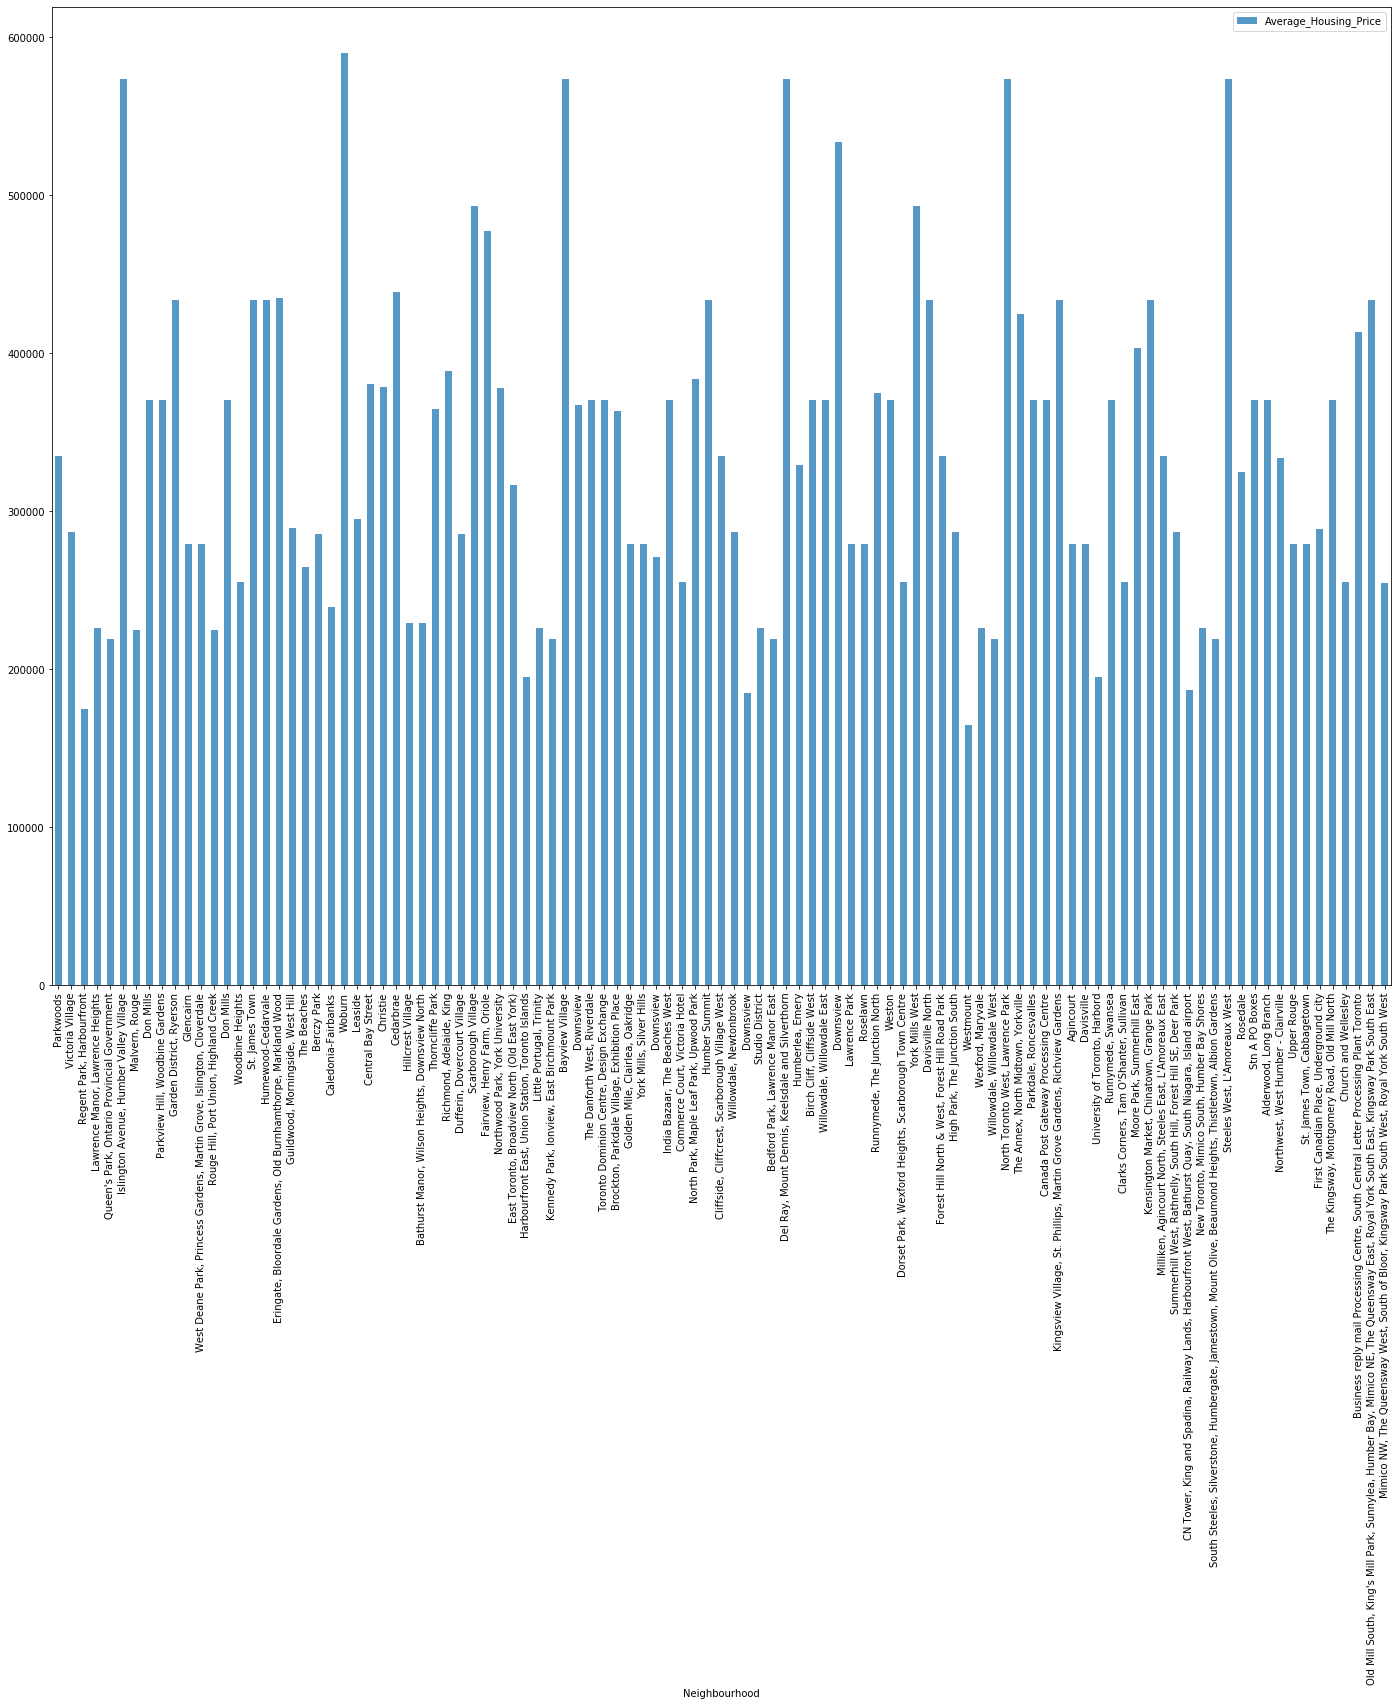

In [96]:
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

In [102]:
# school rating by clusters

clusters=pd.DataFrame({"Cluster1":df1["Neighbourhood"],
                      "Cluster2":df2["Neighbourhood"],
                      "Cluster4":df3["Neighbourhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [105]:
new_Scarborough=Scarborough_merged.set_index("Neighbourhood",drop=True)
#Source:https://www.greatschools.org
Scarborough_school_ratings=pd.DataFrame({"Neighbourhood":toronto["Neighbourhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7
                                                           ]})

Scarborough_school_ratings

,Neighbourhood,Top School Rating
0,Parkwoods,7
1,Victoria Village,9
2,"Regent Park, Harbourfront",5
3,"Lawrence Manor, Lawrence Heights",8
4,"Queen's Park, Ontario Provincial Government",10
5,"Islington Avenue, Humber Valley Village",10
6,"Malvern, Rouge",7
7,Don Mills,10
8,"Parkview Hill, Woodbine Gardens",1
9,"Garden District, Ryerson",2


In [106]:
Scarborough_school_ratings.set_index('Neighbourhood',inplace=True,drop=True)

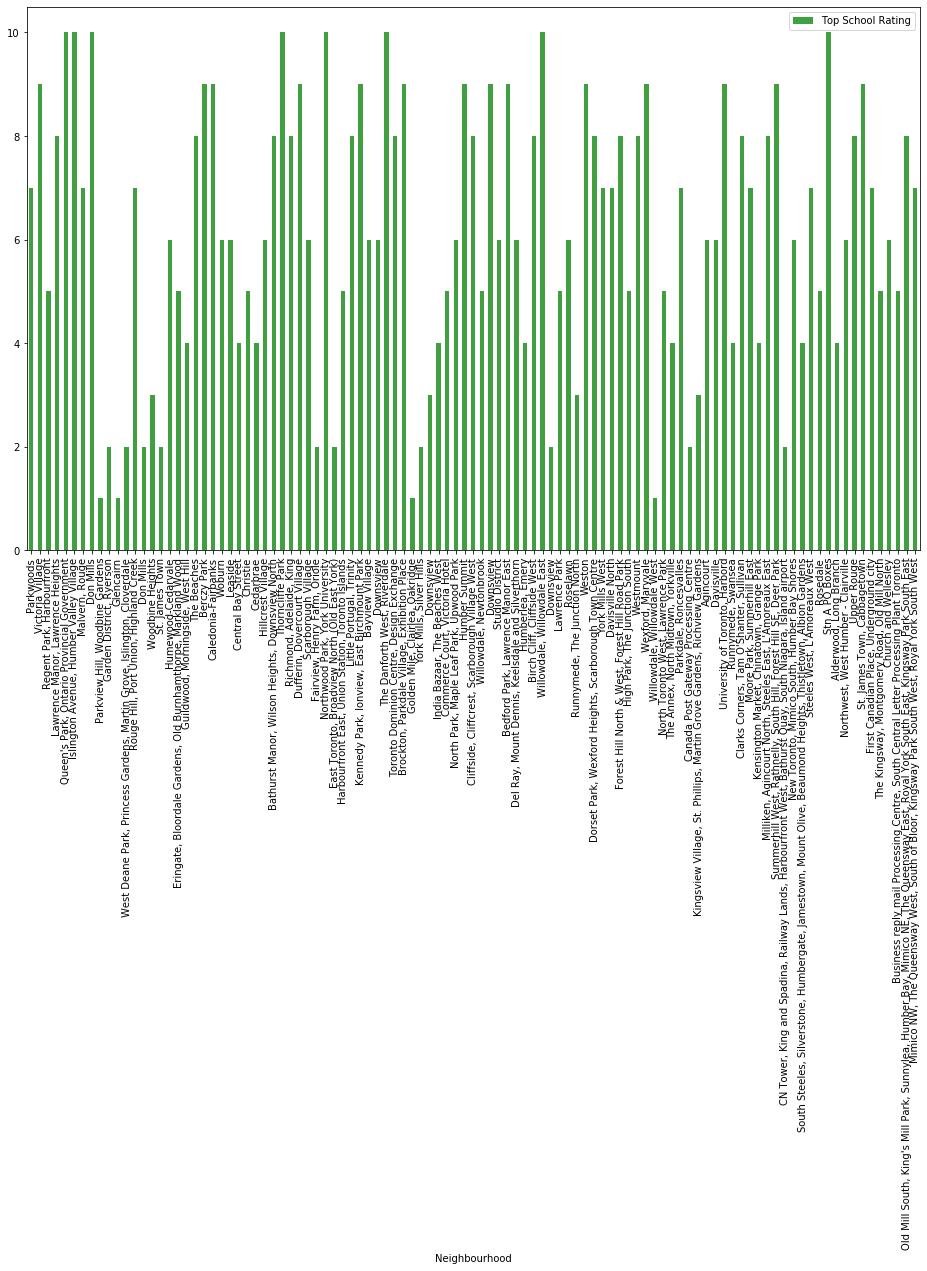

In [107]:
Scarborough_school_ratings.plot(kind='bar',figsize=(16,10),color='green',alpha=0.75);